# Distribution 

Firstly we have to import the appropriate libraries. Overall libray is **tensorflow_probability**

Tensorflow egaer is the impreative execution enviroment for TensorFlow.Every TF oepration is immediately evaluated and produces a result.

In [1]:
import collections

import tensorflow as tf
import tensorflow_probability as tfp
tfd = tfp.distributions

try:
  tf.compat.v1.enable_eager_execution()
except ValueError:
  pass

import matplotlib.pyplot as plt

**Univariate Distributions**


In [2]:
n = tfd.Normal(loc=0., scale =1)
n

# draw sample
n.sample(3)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-0.13165168, -1.9019444 , -0.69318557], dtype=float32)>

In [3]:
#evaluate a log prob
n.log_prob([0., 2., 4.])

#for wide range of distributions

a = tfd.Bernoulli(probs = 0.7)
a.sample(9)
a.log_prob(2)
a.log_prob([2,0,2,3])


<tf.Tensor: shape=(4,), dtype=float32, numpy=array([ 0.49062288, -1.2039728 ,  0.49062288,  1.3379207 ], dtype=float32)>

#Multivariate Distributions


In [4]:
md = tfd.MultivariateNormalDiag(loc=[0., 10.],scale_diag=[1.,4.])

md

<tfp.distributions.MultivariateNormalDiag 'MultivariateNormalDiag' batch_shape=[] event_shape=[2] dtype=float32>

comparing The univariate normal 

In [5]:
tfd.Normal(loc=0., scale=1.)#indicating it's a scalar distribution
md.sample() # in event_shape 2 indicating the basic event space
md.sample(5)

<tf.Tensor: shape=(5, 2), dtype=float32, numpy=
array([[-1.2735757e+00,  2.4577670e+00],
       [ 3.6836436e-01, -5.1989269e-01],
       [-8.7956011e-01,  1.6894360e+01],
       [-1.2516253e+00,  6.0443850e+00],
       [ 3.1128451e-03,  1.5290791e+01]], dtype=float32)>

In TFD multiple ways to create Multivariate normals.

Instructions for updating:
`MultivariateNormalFullCovariance` is deprecated, use `MultivariateNormalTriL(loc=loc, scale_tril=tf.linalg.cholesky(covariance_matrix))` instead.


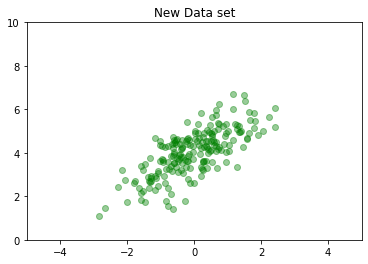

In [6]:
md = tfd.MultivariateNormalFullCovariance(
    loc = [0., 4], covariance_matrix = [[1., .7], [.7, 1.]])

ndata = md.sample(200)

plt.scatter(ndata[:,0], ndata[:,1], color="green", alpha=0.4)
plt.axis([-5, 5,0,10])
plt.title("New Data set")
plt.show()

# Multiple Distributions




In [7]:
b1 = tfd.Bernoulli(probs = [.3, .5, .7])

b1

<tfp.distributions.Bernoulli 'Bernoulli' batch_shape=[3] event_shape=[] dtype=int32>

In the above call defines three indeoendent Bernoulli distributions, which happen to be contained in the same python Distribution object.

In [8]:
b1.sample(6)

<tf.Tensor: shape=(6, 3), dtype=int32, numpy=
array([[0, 0, 1],
       [0, 1, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 1],
       [0, 0, 0]], dtype=int32)>

One could prefrom the same computations by creating a list of ditributions and iterating over them with a for loop.
set of  identically parameterized distributions is extremely common and the use of vectorized computations whenever possible is a key ingredient in being able to perfrom fast computations using hardware accelerators.